<h1> Imports </h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

<h1> Build synthetic dataset that matches a linear pattern</h1>

In [2]:
# Dataset parameters
# np.random.seed(42)
num_samples = 100
slopeX1 = -2
slopeX2 = -2
y_intercept = 5
x_min = -10
x_max = 20
random_scale = 3 # The higher this parameter, the higher the variability, the worse a linear regression model will predict (R-squared will decrease)

# Build dataset (X, y)
X1 = np.linspace(x_min, x_max, num_samples)
X2 = np.linspace(x_min, x_max, num_samples)
y = slopeX1 * X1 + slopeX2 * X2 + y_intercept + np.random.normal(scale=random_scale, size=num_samples)  # Linear relationship with noise to add variability
df = pd.DataFrame({'X1': X1, 'X2': X2, 'y': y})
df

,X1,X2,y
0,-10.000000,-10.000000,46.682118
1,-9.696970,-9.696970,44.360562
2,-9.393939,-9.393939,43.343158
3,-9.090909,-9.090909,42.773341
4,-8.787879,-8.787879,43.665117
...,...,...,...
95,18.787879,18.787879,-73.023478
96,19.090909,19.090909,-72.468991
97,19.393939,19.393939,-74.746008
98,19.696970,19.696970,-74.509180


<h1> Dataset analysis and exploration </h1>

Text(0.5, 0, 'Y')

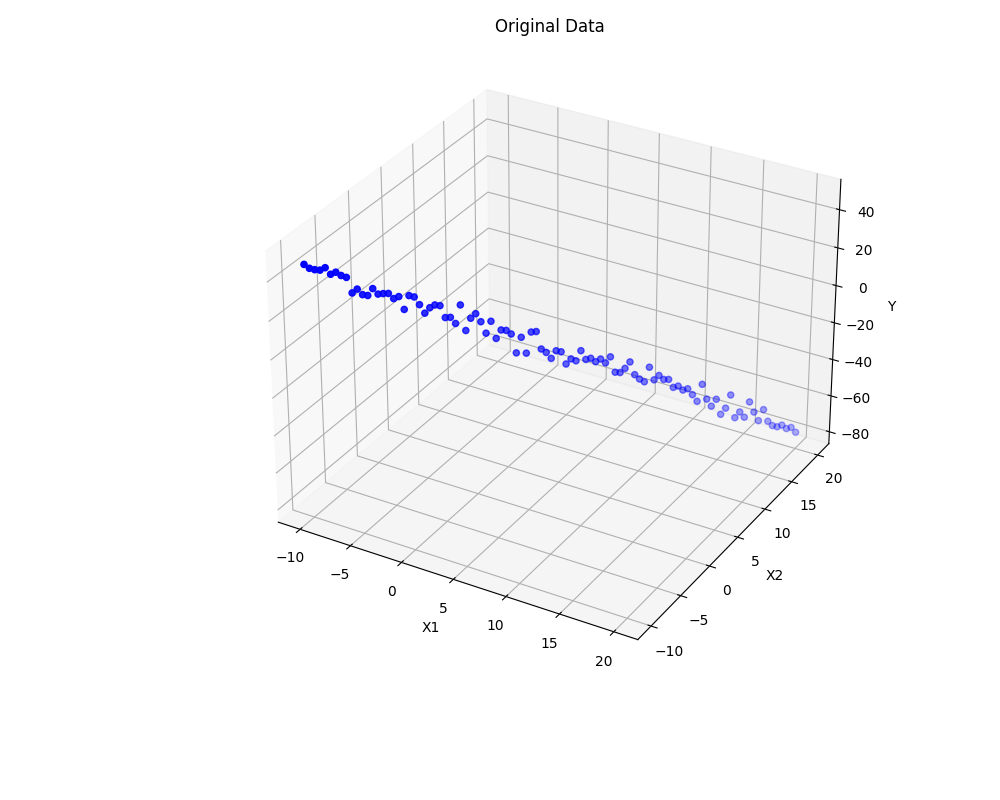

In [3]:
# Visualize the dataset
%matplotlib widget
fig = plt.figure(figsize=(10, 8))
axis = fig.add_axes([0.15, 0.15, 0.8, 0.8], projection='3d')
axis.scatter(X1, X2, y, c='b', marker='o')
axis.set_title('Original Data')
axis.set_xlabel('X1')
axis.set_ylabel('X2')
axis.set_zlabel('Y')

<h1> Model prediction: simple linear regression </h1>

In [4]:
# Get features (X) and target (y) variables
X = df[['X1', 'X2']]
y = df['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [6]:
# Get the model parameters

coefficients = model.coef_
intercept = model.intercept_

print(f'Coefficients: {coefficients}')
print(f'Y intercept: {intercept}')

Coefficients: [-2.01671285 -2.01671285]
Y intercept: 5.035460593803576


In [7]:
# Model evaluation

# MSE
# - possible values: >= 0
# - the smaller the better
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# R-squared: 
# - possible values: [0, 1] interval
# - the higher (closer to 1) the better
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')


Mean Squared Error: 11.292010469222088
R-squared: 0.9904908642783484


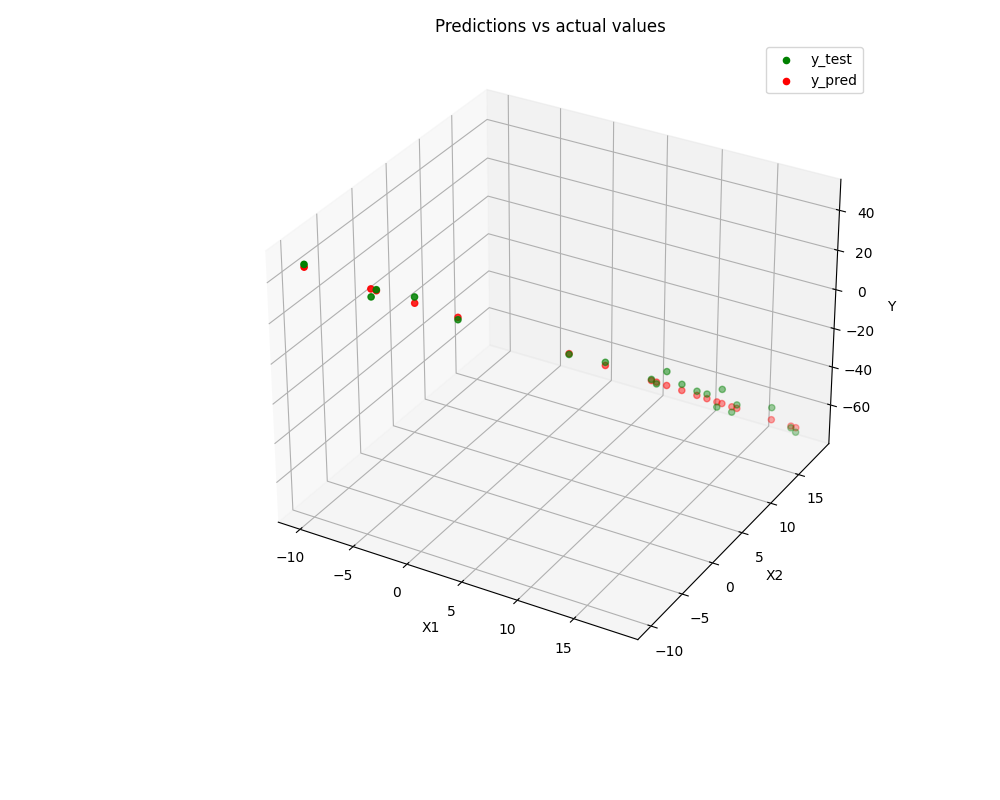

In [8]:
# Visualize predictions and actual values in original feature space

%matplotlib widget
fig = plt.figure(figsize=(10, 8))
axis = fig.add_axes([0.15, 0.15, 0.8, 0.8], projection='3d')
axis.scatter(X_test['X1'], X_test['X2'], y_test, c='g', marker='o', label='y_test')
axis.scatter(X_test['X1'], X_test['X2'], y_pred, c='r', marker='o', label='y_pred')
axis.set_title('Predictions vs actual values')
axis.set_xlabel('X1')
axis.set_ylabel('X2')
axis.set_zlabel('Y')
axis.legend()


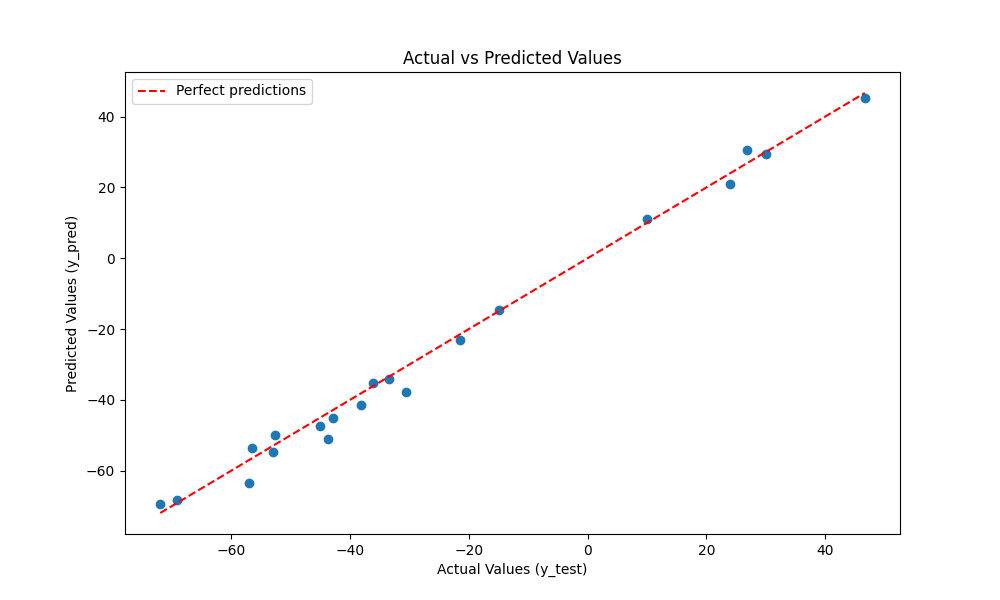

In [9]:
# Plot y_test (actual values) vs y_predicted

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect predictions')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()